In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/max-dataset/Book2.csv
/kaggle/input/loan-defaulter-prediction/case_study_data.xlsx


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("../input/max-dataset/Book2.csv")

In [4]:
data.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

In [6]:
data.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000,2.441000,2.155000,1.300000
std,18.055564,4234.100176,1.572016,1.570292,17.065664,0.697858,0.362086,0.458487
min,6.000000,375.000000,2.000000,2.000000,29.000000,2.000000,2.000000,1.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000,2.000000,2.000000,1.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000,2.000000,2.000000,1.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000,3.000000,2.000000,2.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000,6.000000,3.000000,2.000000


In [7]:
print(data["checkin_acc"].unique())
print(data["credit_history"].unique())
print(data["purpose"].unique())
print(data["svaing_acc"].unique())
print(data["present_emp_since"].unique())
print(data["personal_status"].unique())
print(data["other_debtors"].unique())
print(data["property"].unique())
print(data["housing"].unique())
print(data["job"].unique())
print(data["telephone"].unique())
print(data["foreign_worker"].unique())

['A11' 'A12' 'A14' 'A13']
['A34' 'A32' 'A33' 'A30' 'A31']
['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
['A65' 'A61' 'A63' 'A64' 'A62']
['A75' 'A73' 'A74' 'A71' 'A72']
['A93' 'A92' 'A91' 'A94']
['A101' 'A103' 'A102']
['A121' 'A122' 'A124' 'A123']
['A152' 'A153' 'A151']
['A173' 'A172' 'A174' 'A171']
['A192' 'A191']
['A201' 'A202']


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


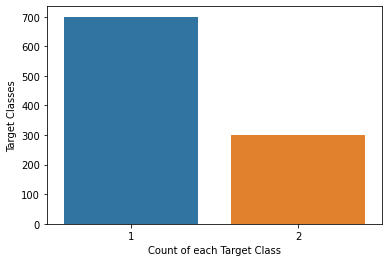

In [8]:
#Checking the distribution of target variable 'status'.
sns.countplot(data.status,data=data)
plt.xlabel("Count of each Target Class")
plt.ylabel("Target Classes")
plt.show()

The graph clearly shows that there is a problem of class imbalance in the data.

In [9]:
p=data.status.value_counts()
print(p)

1    700
2    300
Name: status, dtype: int64


status         1    2
checkin_acc          
A11          139  135
A12          164  105
A13           49   14
A14          348   46


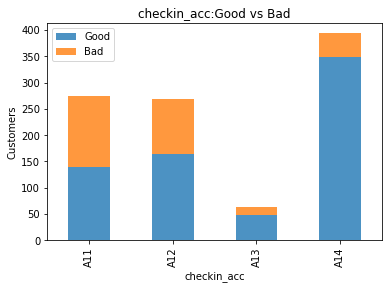

In [10]:
#'checkin_acc:Good vs Bad'
p1=data.groupby(['checkin_acc','status']).checkin_acc.count().unstack()
print(p1)
p1.plot(kind = 'bar', stacked = True, title = 'checkin_acc:Good vs Bad', alpha = .80)
plt.xlabel('checkin_acc')
plt.ylabel('Customers')
plt.legend(['Good','Bad'],prop={"size":10})
plt.show()

status            1    2
credit_history          
A30              15   25
A31              21   28
A32             361  169
A33              60   28
A34             243   50


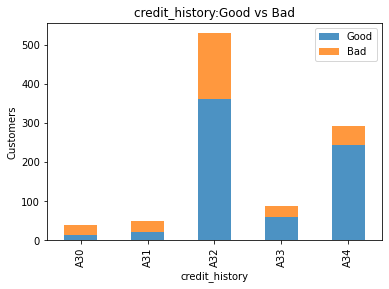

In [11]:
#'credit_history:Good vs Bad
p2=data.groupby(['credit_history','status']).credit_history.count().unstack()
print(p2)
p2.plot(kind = 'bar', stacked = True, title = 'credit_history:Good vs Bad', alpha = .80)
plt.xlabel('credit_history')
plt.ylabel('Customers')
plt.legend(['Good','Bad'],prop={"size":10})
plt.show()

status     1   2
purpose         
A40      145  89
A41       86  17
A410       7   5
A42      123  58
A43      218  62
A44        8   4
A45       14   8
A46       28  22
A48        8   1
A49       63  34


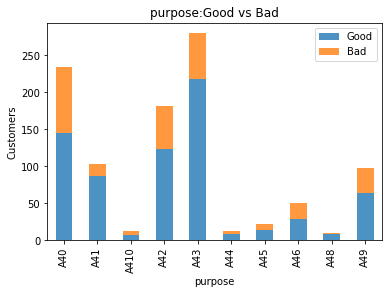

In [12]:
#'purpose:Good vs Bad'
p3=data.groupby(['purpose','status']).purpose.count().unstack()
print(p3)
p3.plot(kind = 'bar', stacked = True, title = 'purpose:Good vs Bad', alpha = .80)
plt.xlabel('purpose')
plt.ylabel('Customers')
plt.legend(['Good','Bad'],prop={"size":10})
plt.show()

status        1    2
svaing_acc          
A61         386  217
A62          69   34
A63          52   11
A64          42    6
A65         151   32


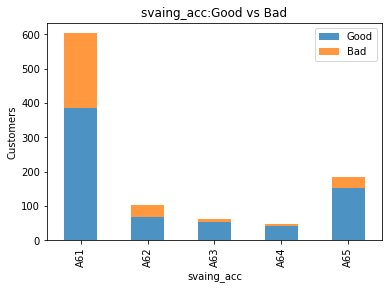

In [13]:
#'svaing_acc:Good vs Bad'
p3=data.groupby(['svaing_acc','status']).svaing_acc.count().unstack()
print(p3)
p3.plot(kind = 'bar', stacked = True, title = 'svaing_acc:Good vs Bad', alpha = .80)
plt.xlabel('svaing_acc')
plt.ylabel('Customers')
plt.legend(['Good','Bad'],prop={"size":10})
plt.show()

status               1    2
present_emp_since          
A71                 39   23
A72                102   70
A73                235  104
A74                135   39
A75                189   64


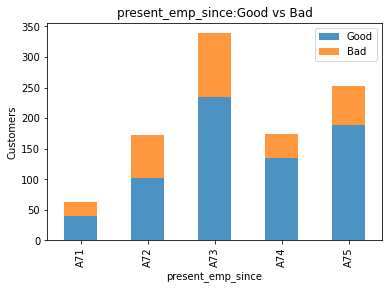

In [14]:
#'present_emp_since:Good vs Bad'
p4=data.groupby(['present_emp_since','status']).present_emp_since.count().unstack()
print(p4)
p4.plot(kind = 'bar', stacked = True, title = 'present_emp_since:Good vs Bad', alpha = .80)
plt.xlabel('present_emp_since')
plt.ylabel('Customers')
plt.legend(['Good','Bad'],prop={"size":10})
plt.show()

status             1    2
personal_status          
A91               30   20
A92              201  109
A93              402  146
A94               67   25


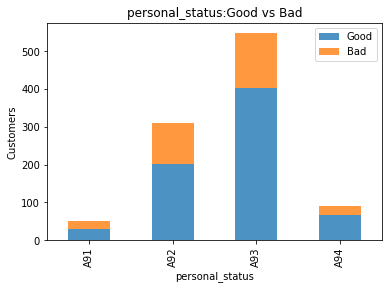

In [15]:
#'personal_status:Good vs Bad'
p5=data.groupby(['personal_status','status']).personal_status.count().unstack()
print(p5)
p5.plot(kind = 'bar', stacked = True, title = 'personal_status:Good vs Bad', alpha = .80)
plt.xlabel('personal_status')
plt.ylabel('Customers')
plt.legend(['Good','Bad'],prop={"size":10})
plt.show()

status           1    2
other_debtors          
A101           635  272
A102            23   18
A103            42   10


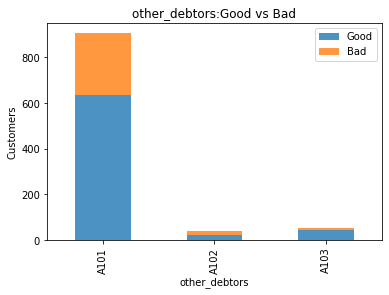

In [16]:
#'other_debtors:Good vs Bad'
p6=data.groupby(['other_debtors','status']).other_debtors.count().unstack()
print(p6)
p6.plot(kind = 'bar', stacked = True, title = 'other_debtors:Good vs Bad', alpha = .80)
plt.xlabel('other_debtors')
plt.ylabel('Customers')
plt.legend(['Good','Bad'],prop={"size":10})
plt.show()

status      1    2
property          
A121      222   60
A122      161   71
A123      230  102
A124       87   67


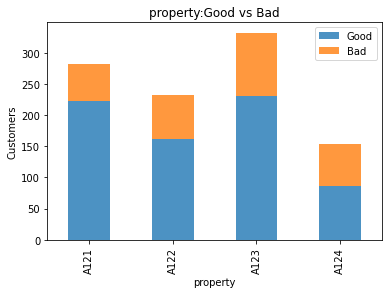

In [17]:
#'property:Good vs Bad'
p7=data.groupby(['property','status']).property.count().unstack()
print(p7)
p7.plot(kind = 'bar', stacked = True, title = 'property:Good vs Bad', alpha = .80)
plt.xlabel('property')
plt.ylabel('Customers')
plt.legend(['Good','Bad'],prop={"size":10})
plt.show()

status     1    2
housing          
A151     109   70
A152     527  186
A153      64   44


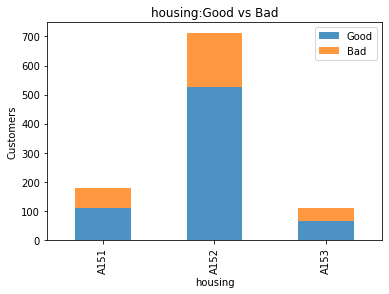

In [18]:
#'housing:Good vs Bad'
p8=data.groupby(['housing','status']).housing.count().unstack()
print(p8)
p8.plot(kind = 'bar', stacked = True, title = 'housing:Good vs Bad', alpha = .80)
plt.xlabel('housing')
plt.ylabel('Customers')
plt.legend(['Good','Bad'],prop={"size":10})
plt.show()

status    1    2
job             
A171     15    7
A172    144   56
A173    444  186
A174     97   51


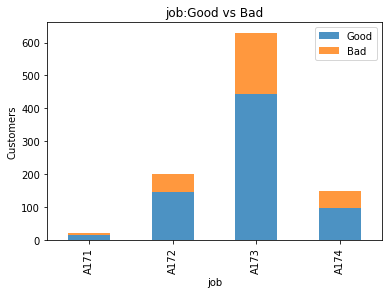

In [19]:
#'job:Good vs Bad'
p9=data.groupby(['job','status']).job.count().unstack()
print(p9)
p9.plot(kind = 'bar', stacked = True, title = 'job:Good vs Bad', alpha = .80)
plt.xlabel('job')
plt.ylabel('Customers')
plt.legend(['Good','Bad'],prop={"size":10})
plt.show()

status       1    2
telephone          
A191       409  187
A192       291  113


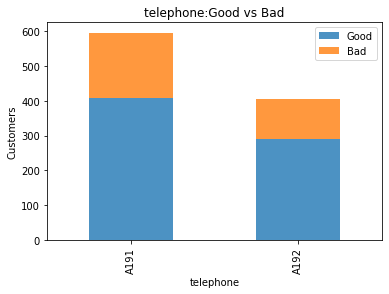

In [20]:
#'telephone:Good vs Bad'
p10=data.groupby(['telephone','status']).telephone.count().unstack()
print(p10)
p10.plot(kind = 'bar', stacked = True, title = 'telephone:Good vs Bad', alpha = .80)
plt.xlabel('telephone')
plt.ylabel('Customers')
plt.legend(['Good','Bad'],prop={"size":10})
plt.show()

status            1    2
foreign_worker          
A201            667  296
A202             33    4


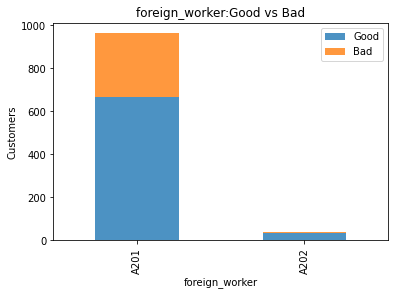

In [21]:
#'foreign_worker:Good vs Bad'
p11=data.groupby(['foreign_worker','status']).foreign_worker.count().unstack()
print(p11)
p11.plot(kind = 'bar', stacked = True, title = 'foreign_worker:Good vs Bad', alpha = .80)
plt.xlabel('foreign_worker')
plt.ylabel('Customers')
plt.legend(['Good','Bad'],prop={"size":10})
plt.show()

Continuous Variables


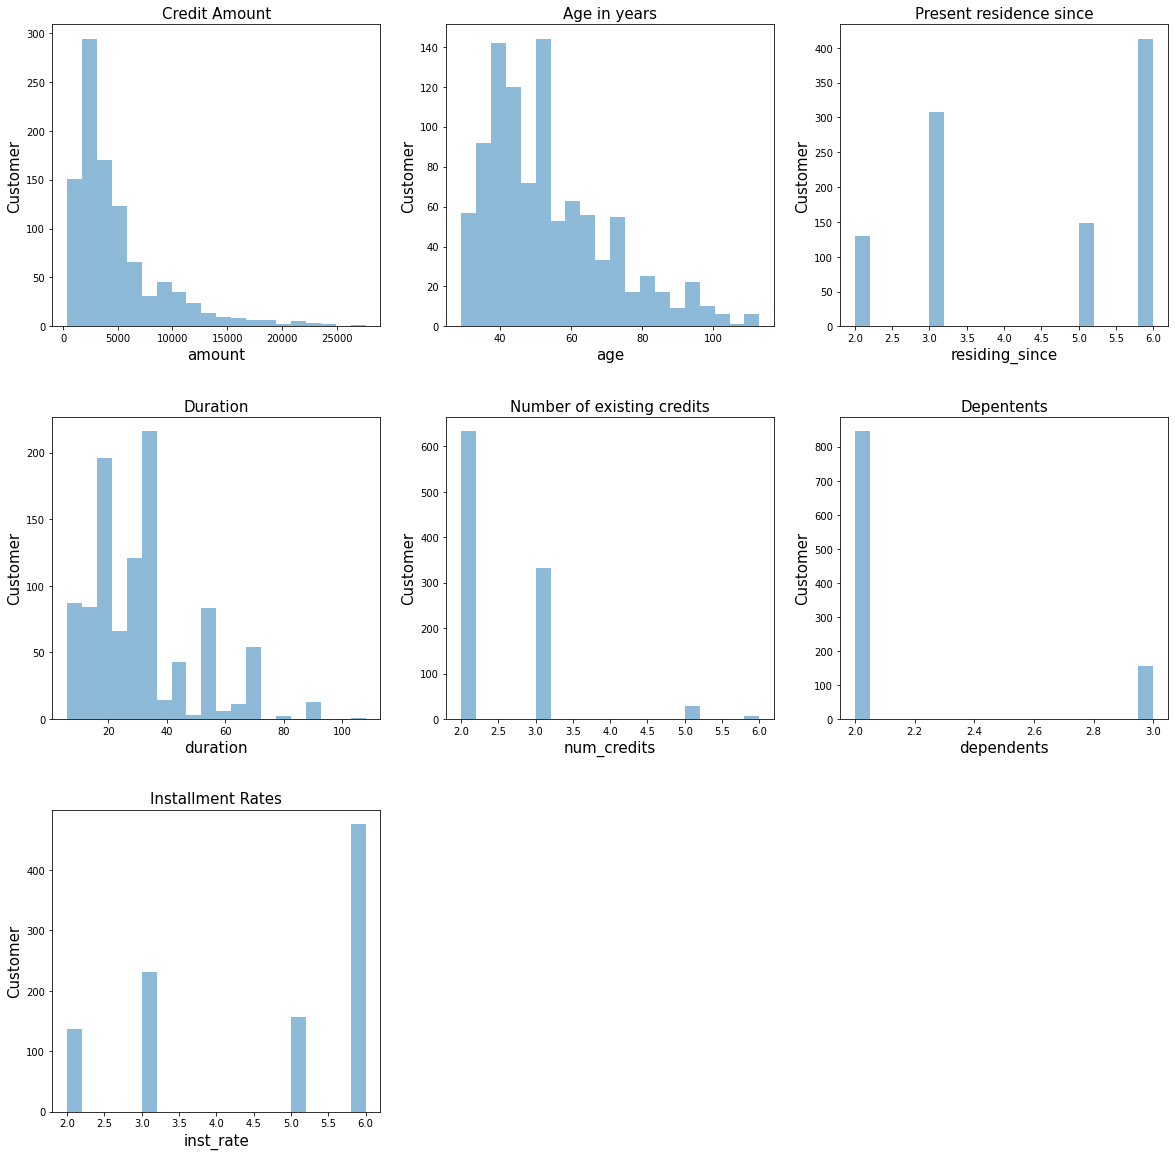

In [22]:
print('Continuous Variables')

# Subplots of Numeric Features
fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(331)
ax1.hist(data['amount'], bins = 20, alpha = .50)
ax1.set_xlabel('amount', fontsize = 15)
ax1.set_ylabel('Customer',fontsize = 15)
ax1.set_title('Credit Amount',fontsize = 15)

ax2 = fig.add_subplot(333)
ax2.hist(data['residing_since'], bins = 20, alpha = .50)
ax2.set_xlabel('residing_since',fontsize = 15)
ax2.set_ylabel('Customer',fontsize = 15)
ax2.set_title('Present residence since',fontsize = 15)

ax3 = fig.add_subplot(334)
ax3.hist(data['duration'], bins = 20, alpha = .50)
ax3.set_xlabel('duration',fontsize = 15)
ax3.set_ylabel('Customer',fontsize = 15)
ax3.set_title('Duration',fontsize = 15)

ax4 = fig.add_subplot(335)
ax4.hist(data['num_credits'], bins = 20, alpha = .50)
ax4.set_xlabel('num_credits',fontsize = 15)
ax4.set_ylabel('Customer',fontsize = 15)
ax4.set_title('Number of existing credits',fontsize = 15)

ax5 = fig.add_subplot(336)
ax5.hist(data['dependents'], bins = 20, alpha = .50)
ax5.set_xlabel('dependents',fontsize = 15)
ax5.set_ylabel('Customer',fontsize = 15)
ax5.set_title('Depentents',fontsize = 15)

ax6 = fig.add_subplot(332)
ax6.hist(data['age'], bins = 20, alpha = .50)
ax6.set_xlabel('age',fontsize = 15)
ax6.set_ylabel('Customer',fontsize = 15)
ax6.set_title('Age in years',fontsize = 15)

ax7 = fig.add_subplot(337)
ax7.hist(data['inst_rate'], bins = 20, alpha = .50)
ax7.set_xlabel('inst_rate',fontsize = 15)
ax7.set_ylabel('Customer',fontsize = 15)
ax7.set_title('Installment Rates',fontsize = 15)

plt.show()

In [23]:
numerical_df = data.select_dtypes(exclude = 'object')
numerical_df=numerical_df.drop('status',axis=1)

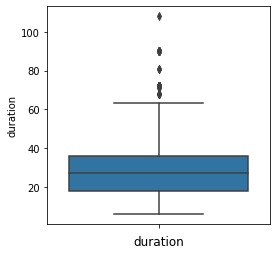

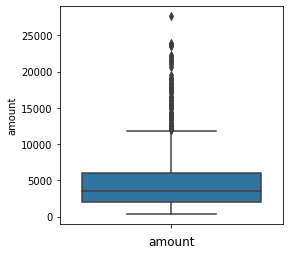

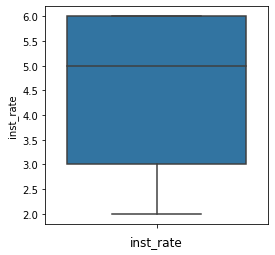

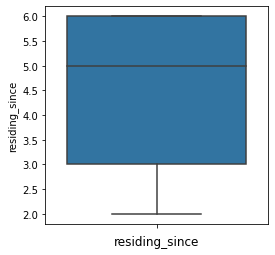

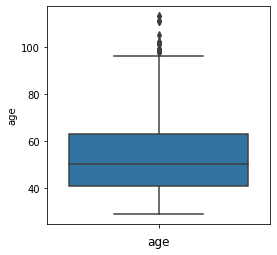

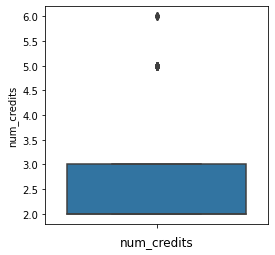

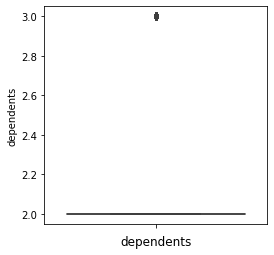

In [24]:
# Confirming the outliers

for i in numerical_df:
    plt.figure(figsize =(4,4))
    sns.boxplot(data = data, y = i);
    plt.xlabel(i, fontsize = 12)

The above boxplots shows that 'duration','amount','age','num_credits' and 'dependents' has some outliers.

<AxesSubplot:>

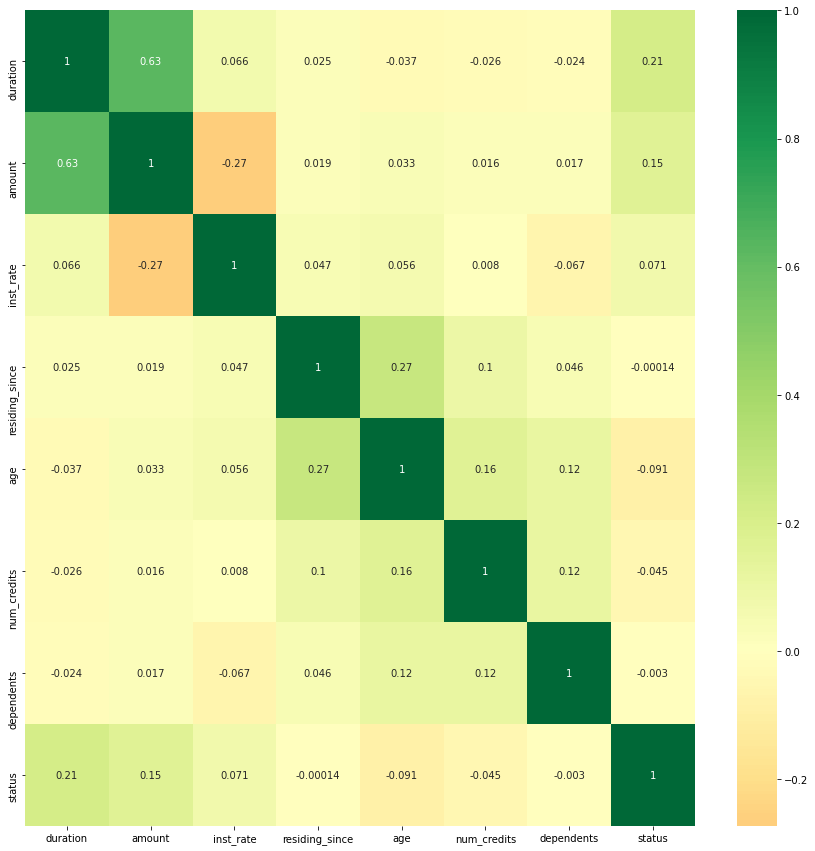

In [25]:
#Drawing correlation plot
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',center=0)

Heatmap has drawn the correlation plot only between numericals columns.
From the graph it shows that 'amount' amd 'duration' are positively correlated but not sevearly. Therefore we conclude that there is no multicollinearity in the data.

In [26]:
x = data.drop(['status'],axis=1)
y = data.status

In [27]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [28]:
x_train.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker
863,A14,41,A34,A42,6789,A64,A72,6,A93,A101,3,A121,48,A142,A152,3,A172,3,A192,A201
748,A14,32,A32,A41,7872,A65,A73,2,A93,A101,5,A123,39,A143,A152,2,A173,2,A191,A201
64,A14,36,A32,A43,4772,A61,A72,6,A92,A101,6,A122,39,A143,A152,2,A173,2,A192,A201
798,A14,36,A33,A40,1076,A65,A75,6,A94,A101,6,A123,81,A143,A152,3,A173,2,A192,A201
52,A14,18,A32,A43,1893,A61,A73,5,A93,A101,3,A123,38,A143,A152,2,A173,2,A191,A201


In [29]:
y_train.head()

863    1
748    1
64     1
798    1
52     1
Name: status, dtype: int64

In [30]:
# Converting categorical variables into dummy variables for training set.
# drop_first prevents multi-collinearity
checkin_acc = pd.get_dummies(x_train['checkin_acc'], drop_first = True) 
credit_history = pd.get_dummies(x_train['credit_history'], drop_first = True)
purpose = pd.get_dummies(x_train['purpose'], drop_first = True)
svaing_acc = pd.get_dummies(x_train['svaing_acc'], drop_first = True)
present_emp_since = pd.get_dummies(x_train['present_emp_since'], drop_first = True)
personal_status = pd.get_dummies(x_train['personal_status'], drop_first = True)
other_debtors = pd.get_dummies(x_train['other_debtors'], drop_first = True)
property = pd.get_dummies(x_train['property'], drop_first = True)
inst_plans = pd.get_dummies(x_train['inst_plans'], drop_first = True)
housing = pd.get_dummies(x_train['housing'], drop_first = True)
job = pd.get_dummies(x_train['job'], drop_first = True)
telephone = pd.get_dummies(x_train['telephone'], drop_first = True)
foreign_worker = pd.get_dummies(x_train['foreign_worker'], drop_first = True)

x_train = pd.concat([x_train, checkin_acc, credit_history,purpose,svaing_acc,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker], axis = 1)
x_train.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,A124,A142,A143,A152,A153,A172,A173,A174,A192,A202
863,A14,41,A34,A42,6789,A64,A72,6,A93,A101,...,0,1,0,1,0,1,0,0,1,0
748,A14,32,A32,A41,7872,A65,A73,2,A93,A101,...,0,0,1,1,0,0,1,0,0,0
64,A14,36,A32,A43,4772,A61,A72,6,A92,A101,...,0,0,1,1,0,0,1,0,1,0
798,A14,36,A33,A40,1076,A65,A75,6,A94,A101,...,0,0,1,1,0,0,1,0,1,0
52,A14,18,A32,A43,1893,A61,A73,5,A93,A101,...,0,0,1,1,0,0,1,0,0,0


In [31]:
x_train.drop(["checkin_acc", "credit_history","purpose","svaing_acc","present_emp_since","personal_status","other_debtors","property","inst_plans","housing","job","telephone","foreign_worker"], axis = 1, inplace = True)
x_train.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,A12,A13,A14,...,A124,A142,A143,A152,A153,A172,A173,A174,A192,A202
863,41,6789,6,3,48,3,3,0,0,1,...,0,1,0,1,0,1,0,0,1,0
748,32,7872,2,5,39,2,2,0,0,1,...,0,0,1,1,0,0,1,0,0,0
64,36,4772,6,6,39,2,2,0,0,1,...,0,0,1,1,0,0,1,0,1,0
798,36,1076,6,6,81,3,2,0,0,1,...,0,0,1,1,0,0,1,0,1,0
52,18,1893,5,3,38,2,2,0,0,1,...,0,0,1,1,0,0,1,0,0,0


In [32]:
x_train.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,A12,A13,A14,...,A124,A142,A143,A152,A153,A172,A173,A174,A192,A202
863,41,6789,6,3,48,3,3,0,0,1,...,0,1,0,1,0,1,0,0,1,0
748,32,7872,2,5,39,2,2,0,0,1,...,0,0,1,1,0,0,1,0,0,0
64,36,4772,6,6,39,2,2,0,0,1,...,0,0,1,1,0,0,1,0,1,0
798,36,1076,6,6,81,3,2,0,0,1,...,0,0,1,1,0,0,1,0,1,0
52,18,1893,5,3,38,2,2,0,0,1,...,0,0,1,1,0,0,1,0,0,0


In [33]:
#Feature scaling for training dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)


In [34]:
#handling class imbalance by oversampling method for training dataset.
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x_train,y_train)
y_ros.value_counts()

1    466
2    466
Name: status, dtype: int64

In [35]:
#Fitting logistic regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#Training the model
lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
# Converting categorical variables into dummy variables for test set.
# drop_first prevents multi-collinearity
checkin_acc = pd.get_dummies(x_test['checkin_acc'], drop_first = True) 
credit_history = pd.get_dummies(x_test['credit_history'], drop_first = True)
purpose = pd.get_dummies(x_test['purpose'], drop_first = True)
svaing_acc = pd.get_dummies(x_test['svaing_acc'], drop_first = True)
present_emp_since = pd.get_dummies(x_test['present_emp_since'], drop_first = True)
personal_status = pd.get_dummies(x_test['personal_status'], drop_first = True)
other_debtors = pd.get_dummies(x_test['other_debtors'], drop_first = True)
property = pd.get_dummies(x_test['property'], drop_first = True)
inst_plans = pd.get_dummies(x_test['inst_plans'], drop_first = True)
housing = pd.get_dummies(x_test['housing'], drop_first = True)
job = pd.get_dummies(x_test['job'], drop_first = True)
telephone = pd.get_dummies(x_test['telephone'], drop_first = True)
foreign_worker = pd.get_dummies(x_test['foreign_worker'], drop_first = True)

x_test = pd.concat([x_test, checkin_acc, credit_history,purpose,svaing_acc,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker], axis = 1)
x_test.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,A124,A142,A143,A152,A153,A172,A173,A174,A192,A202
993,A11,54,A32,A42,5939,A61,A71,6,A93,A101,...,0,0,1,1,0,0,0,1,1,0
859,A14,14,A32,A40,5366,A62,A73,2,A93,A103,...,0,0,1,0,0,0,1,0,0,1
298,A14,27,A32,A42,3773,A61,A73,5,A93,A101,...,0,0,1,1,0,0,1,0,1,0
553,A12,18,A34,A40,2993,A62,A72,6,A93,A101,...,0,0,1,1,0,0,1,0,0,0
672,A14,90,A32,A40,15549,A61,A75,3,A93,A101,...,0,0,1,1,0,0,0,1,1,0


In [37]:
x_test.drop(["checkin_acc", "credit_history","purpose","svaing_acc","present_emp_since","personal_status","other_debtors","property","inst_plans","housing","job","telephone","foreign_worker"], axis = 1, inplace = True)
x_test.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,A12,A13,A14,...,A124,A142,A143,A152,A153,A172,A173,A174,A192,A202
993,54,5939,6,5,45,2,2,0,0,0,...,0,0,1,1,0,0,0,1,1,0
859,14,5366,2,3,39,2,3,0,0,1,...,0,0,1,0,0,0,1,0,0,1
298,27,3773,5,6,65,2,2,0,0,1,...,0,0,1,1,0,0,1,0,1,0
553,18,2993,6,2,41,2,2,1,0,0,...,0,0,1,1,0,0,1,0,0,0
672,90,15549,3,6,63,2,2,0,0,1,...,0,0,1,1,0,0,0,1,1,0


In [38]:
#Feature scaling for test dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_test=sc.fit_transform(x_test)


In [39]:
#handling class imbalance by oversampling method for test dataset.
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_ros1,y_ros1=ros.fit_resample(x_test,y_test)
y_ros1.value_counts()

1    234
2    234
Name: status, dtype: int64

In [40]:
#Model predictions
y_pred=lr.predict(x_test)
lr_probs=lr.predict_proba(x_test)
y_pred

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1,

In [41]:
#Checking performance of the model
from sklearn.metrics import accuracy_score
print('Accuracy')
score_lr=lr.score(x_test,y_test)
print(score_lr)

print('\n')
print('--'*40)

#Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('\n')
print('--'*40)

#Classification report
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred))


Accuracy
0.7424242424242424


--------------------------------------------------------------------------------
Confusion Matrix
[[197  37]
 [ 48  48]]


--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           1       0.80      0.84      0.82       234
           2       0.56      0.50      0.53        96

    accuracy                           0.74       330
   macro avg       0.68      0.67      0.68       330
weighted avg       0.73      0.74      0.74       330

